In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import re

In [8]:
delta = 0.99
gamma = 1
lamb = 2
Rf_rate = 1.0303

In [9]:
epsilon = np.random.standard_normal(10000)

In [10]:
ln_g_consumption_growth = 0.02+0.02*epsilon

In [11]:
g_consumption_growth = np.exp(ln_g_consumption_growth)

In [12]:
b_o = np.arange(0,10.1,0.1)

In [13]:
optimized_list = []
from scipy import optimize
def er_func(kappa):
    b_x = b_o[i]
    a = kappa*g_consumption_growth
    nu_R = np.where(a>1.0303,a-1.0303,2*(a-1.0303))
    kappa1 = 0.99*b_x*(nu_R.mean())+0.99*kappa-1
    return kappa1

for i in range(len(b_o)):
    optimized_list.append(optimize.bisect(er_func,1,1.1))

optimized_list = np.array(optimized_list)


In [14]:
optimized_list

array([1.01010101, 1.01072721, 1.0112093 , 1.0115925 , 1.01190478,
       1.01216442, 1.01238387, 1.01257184, 1.0127347 , 1.01287721,
       1.01300297, 1.01311478, 1.01321487, 1.01330501, 1.01338662,
       1.01346084, 1.01352864, 1.01359083, 1.01364806, 1.01370092,
       1.0137499 , 1.01379539, 1.01383776, 1.0138773 , 1.01391429,
       1.01394898, 1.01398157, 1.01401225, 1.01404118, 1.01406851,
       1.01409437, 1.01411887, 1.01414212, 1.01416422, 1.01418524,
       1.01420527, 1.01422437, 1.0142426 , 1.01426003, 1.01427671,
       1.01429267, 1.01430798, 1.01432266, 1.01433676, 1.01435031,
       1.01436335, 1.01437589, 1.01438798, 1.01439962, 1.01441086,
       1.0144217 , 1.01443217, 1.01444228, 1.01445206, 1.01446152,
       1.01447068, 1.01447955, 1.01448814, 1.01449647, 1.01450455,
       1.01451238, 1.01451999, 1.01452738, 1.01453455, 1.01454153,
       1.01454831, 1.01455491, 1.01456133, 1.01456758, 1.01457366,
       1.01457959, 1.01458537, 1.014591  , 1.01459649, 1.01460

In [45]:
Price_Dividend_Ratio = 1/(optimized_list-1)


In [46]:
Price_Dividend_Ratio


array([98.99999999, 93.02231622, 88.89327262, 85.86428971, 83.54564393,
       81.71202702, 80.22478443, 78.99330033, 77.95688988, 77.07227801,
       76.30841294, 75.64202736, 75.05551547, 74.53521937, 74.07054015,
       73.65297907, 73.27575417, 72.93326275, 72.62088639, 72.33473527,
       72.07173166, 71.8291796 , 71.60474751, 71.3964766 , 71.20267587,
       71.02189   , 70.85286579, 70.69443808, 70.54568247, 70.40572864,
       70.27380467, 70.14926477, 70.03149284, 69.91995654, 69.8141813 ,
       69.71372224, 69.61818686, 69.52721201, 69.44048631, 69.35772523,
       69.27865662, 69.20304262, 69.1306566 , 69.06129243, 68.99476658,
       68.93091175, 68.86957738, 68.81061045, 68.75388079, 68.69926139,
       68.64663869, 68.59590282, 68.54695221, 68.4996914 , 68.4540343 ,
       68.40990542, 68.36722924, 68.32593392, 68.28595167, 68.2472202 ,
       68.20968334, 68.17328406, 68.13797118, 68.10370131, 68.0704274 ,
       68.03810724, 68.00669977, 67.97616448, 67.94646473, 67.91

In [47]:
data_table = pd.DataFrame({'b_o':b_o,'kappa':optimized_list,'P/D Ratio':Price_Dividend_Ratio})

Text(0.5, 1.0, 'Plot of Price-Dividend Ratio on scale factor b0')

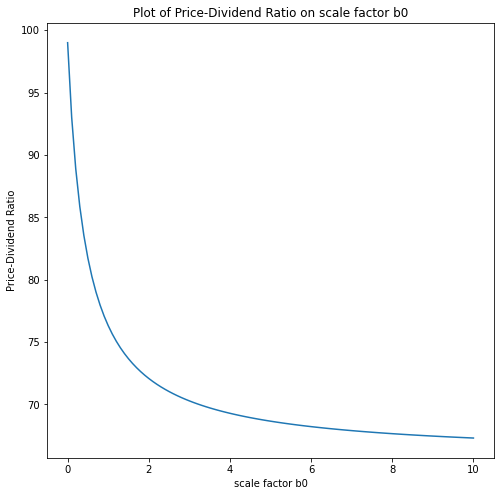

In [76]:
plt.figure(figsize=(8,8))
plt.plot(b_o,Price_Dividend_Ratio)
plt.xlabel('scale factor b0')
plt.ylabel('Price-Dividend Ratio')
plt.title('Plot of Price-Dividend Ratio on scale factor b0')

In [49]:
Expected_market_return = (optimized_list*g_consumption_growth.mean())
Rf_rate = 1.0303
Equity_Premium = Expected_market_return - Rf_rate
Equity_Premium

array([0.00047638, 0.00113877, 0.00164832, 0.00205329, 0.00238312,
       0.00265721, 0.00288873, 0.00308704, 0.00325878, 0.00340903,
       0.00354157, 0.00365938, 0.0037648 , 0.00385971, 0.0039456 ,
       0.00402371, 0.00409503, 0.00416043, 0.00422062, 0.0042762 ,
       0.00432769, 0.0043755 , 0.00442003, 0.0044616 , 0.0045005 ,
       0.00453698, 0.00457126, 0.00460354, 0.00463398, 0.00466273,
       0.00468994, 0.00471572, 0.00474018, 0.00476343, 0.00478554,
       0.00480661, 0.00482669, 0.00484587, 0.0048642 , 0.00488174,
       0.00489853, 0.00491463, 0.00493007, 0.00494489, 0.00495914,
       0.00497284, 0.00498603, 0.00499872, 0.00501096, 0.00502276,
       0.00503415, 0.00504514, 0.00505577, 0.00506604, 0.00507597,
       0.00508559, 0.0050949 , 0.00510392, 0.00511267, 0.00512115,
       0.00512938, 0.00513736, 0.00514512, 0.00515266, 0.00515998,
       0.0051671 , 0.00517403, 0.00518077, 0.00518733, 0.00519372,
       0.00519995, 0.00520601, 0.00521193, 0.0052177 , 0.00522

In [50]:
Expected_market_return

array([1.03077638, 1.03143877, 1.03194832, 1.03235329, 1.03268312,
       1.03295721, 1.03318873, 1.03338704, 1.03355878, 1.03370903,
       1.03384157, 1.03395938, 1.0340648 , 1.03415971, 1.0342456 ,
       1.03432371, 1.03439503, 1.03446043, 1.03452062, 1.0345762 ,
       1.03462769, 1.0346755 , 1.03472003, 1.0347616 , 1.0348005 ,
       1.03483698, 1.03487126, 1.03490354, 1.03493398, 1.03496273,
       1.03498994, 1.03501572, 1.03504018, 1.03506343, 1.03508554,
       1.03510661, 1.03512669, 1.03514587, 1.0351642 , 1.03518174,
       1.03519853, 1.03521463, 1.03523007, 1.03524489, 1.03525914,
       1.03527284, 1.03528603, 1.03529872, 1.03531096, 1.03532276,
       1.03533415, 1.03534514, 1.03535577, 1.03536604, 1.03537597,
       1.03538559, 1.0353949 , 1.03540392, 1.03541267, 1.03542115,
       1.03542938, 1.03543736, 1.03544512, 1.03545266, 1.03545998,
       1.0354671 , 1.03547403, 1.03548077, 1.03548733, 1.03549372,
       1.03549995, 1.03550601, 1.03551193, 1.0355177 , 1.03552